In [1]:
from scipy.interpolate import griddata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../measurements/JPEG_manager_sparsity/characteristic.csv")

In [3]:
df.head()

,pruning_thresh,target_sparsity,quality,technique,bandwidth,mAP_drop,frame_id,sparsity,decomposability,regularity,pictoriality,datasize_est,datasize_real,reconstruct_snr,target_cmp,target_snr
0,0.001,0.1,86,1,2.498029e+07,40,1,0.120608,-1,-1,-1,29719,30463,12.790723,18.473873,20
1,0.011,0.1,73,1,2.492123e+07,40,2,0.106879,-1,-1,-1,6517,7261,12.703433,18.517654,20
2,0.011,0.1,69,1,2.482305e+07,40,3,0.109479,-1,-1,-1,11970,12714,13.118558,18.590892,20
3,0.011,0.1,72,1,2.468615e+07,40,4,0.107849,-1,-1,-1,11243,11987,13.191020,18.693992,20
4,0.011,0.1,72,1,2.451106e+07,40,5,0.108381,-1,-1,-1,3987,4731,12.907881,18.827530,20


In [4]:
sample_space = [[0.1, 60],   [0.1,100],    [0.99,60],    [0.99,100],   [0.9,60],   [0.9,100]]
sample_space_snr = [ 48,       5,         80,                 30,          50,         5]

In [5]:
sparsity = df["target_sparsity"].to_numpy()
quality = df["quality"].to_numpy()
snr_m = df["reconstruct_snr"].to_numpy()

In [6]:
est_err = []
history_point = []
history_snr =[]

for i in range(len(sparsity)):
    sample_points = sample_space+history_point
    sample_snrs = sample_space_snr +history_snr
    # snr_est = griddata(sample_points, sample_snrs, (sparsity[i],quality[i]), method='cubic')
    snr_est = griddata(sample_points, sample_snrs, (sparsity[i],quality[i]), method='linear')
    est_err.append(snr_est-snr_m[i])
    history_point.append((sparsity[i],quality[i]))
    history_snr.append(snr_m[i])


In [13]:
est_err_window = []
est_snr_window = []
window_size = 5
history_point = []
history_snr =[]

for i in range(len(sparsity)):
    sample_points = sample_space+history_point
    sample_snrs = sample_space_snr +history_snr
    # snr_est = griddata(sample_points, sample_snrs, (sparsity[i],quality[i]), method='cubic')
    snr_est = griddata(sample_points, sample_snrs, (sparsity[i],quality[i]), method='cubic')
    est_snr_window.append(snr_est)
    est_err_window.append(snr_est-snr_m[i])

    if len(history_point)<window_size:
        history_point.append((sparsity[i],quality[i]))
        history_snr.append(snr_m[i])
    else:
        index = i%window_size
        history_point[index] = (sparsity[i],quality[i])
        history_snr[index] =  snr_m[i]


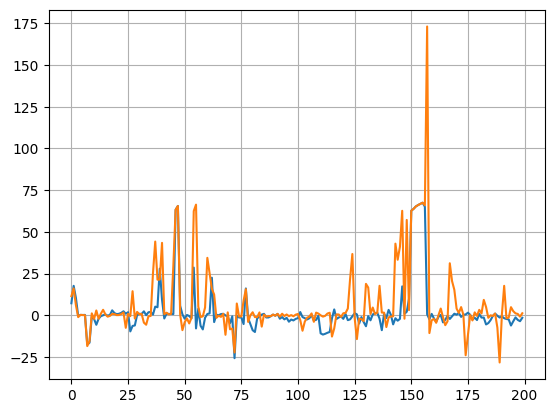

In [14]:
plt.figure()
plt.plot(est_err)
plt.plot(est_err_window)
# plt.ylim([-30,3])
plt.grid()

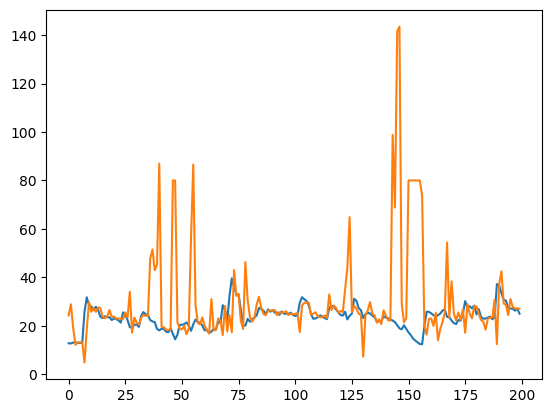

In [9]:
plt.figure()
plt.plot(snr_m)
plt.plot(est_snr_window)

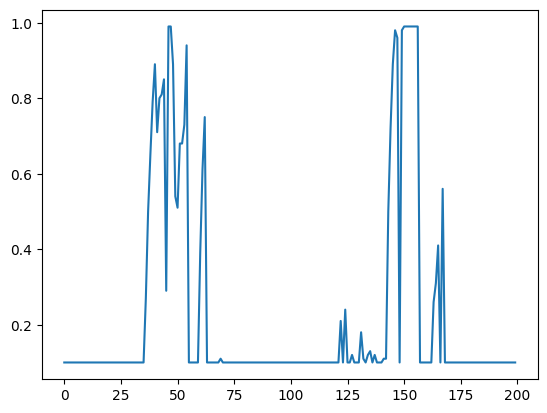

In [12]:
plt.figure()
plt.plot(sparsity)